# Imports
Simply import used modules and set theme/font.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn
rcParams['text.usetex'] = True   # Nicer font. Note: requires (La)TeX to be installed
seaborn.set(style='ticks')                  # Nicer theme

# Read file
Read file and double check that everything looks good by plotting closing prices.

In [2]:
file = r"C:\Users\ericb\Google drive\Tidsserie\GME\Game Stop Data.xlsx" # file location on Eric's laptop. Change for you.
df = pd.read_excel(file)
df = df.set_index("Date")
df = df.sort_index()

            Close     Volume  Open  High   Low  No_Short  No_out
Date                                                            
2020-03-09   3.70  2732022.0  3.59  3.97  3.50       NaN    64.3
2020-03-10   4.23  4863169.0  3.94  4.26  3.80       NaN    64.3
2020-03-11   4.14  4414196.0  4.14  4.25  4.00       NaN    64.3
2020-03-12   3.98  5123363.0  3.70  4.04  3.48       NaN    64.3


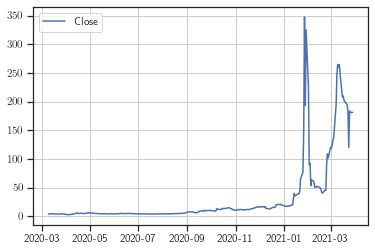

In [3]:
print(df.head(4))
plt.plot(df["Close"])
plt.legend(["Close"])
plt.grid(True)
plt.show()

# A. Short interest

Maximum short interest during time period:  107.94966236955187


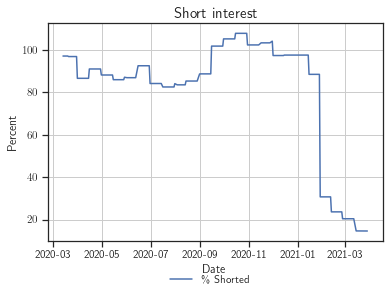

In [4]:
# Calculate short interest in percent. Note that "outstanding" was in million in original data.
df["Perc_short"] = df["No_Short"]/df["No_out"]*10**(-6)*100

# Define plot figure
fig, ax = plt.subplots()
ax.set_title('Short interest',fontsize=15)
ax.set_ylabel("Percent")
ax.set_xlabel("Date")
ax.grid(True)

# Plot short interest on date axis.
ax.plot(df["Perc_short"],label="\% Shorted")
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.04), ncol=2, frameon=False) # ncol = # columns

plt.savefig('a-Short-interest-over-time.pdf',bbox_inches='tight') # Save figure to use in report.

print("Maximum short interest during time period: ", df['Perc_short'].max())

# B. Short interest vs. closing price

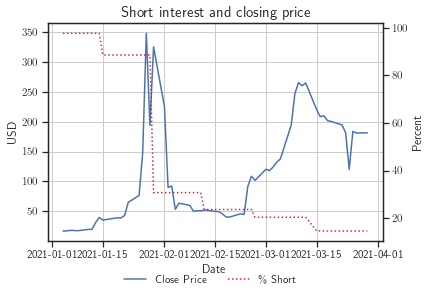

In [5]:
# Define plot figure
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax1.set_title('Short interest and closing price',fontsize=15)
ax1.set_xlabel('Date')
ax1.set_ylabel('USD')
ax2.set_ylabel('Percent')
ax1.grid(True)

# Plot on each axis
ax1.plot(df['Close'][df.index>"2021-01-01"],label='Close Price')
ax2.plot(df['Perc_short'][df.index>"2021-01-01"], color='tab:red',label='\% Short',ls=':')

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.04), ncol=2, frameon=False) # ncol = # columns
plt.savefig('Short-interest-and-closing-price.pdf',bbox_inches='tight')

# C. Intra-day vol and Short position

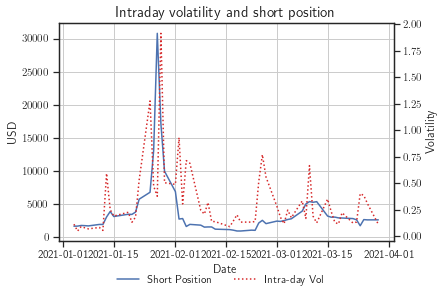

In [6]:
# Calculate each intra-day vol & short position as defined in assignment
df["intra-day_vol"] = (df['High']-df['Low'])/df['Close']
df['short-position'] = df['Close']*df['Perc_short']

# Define plot figure
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  if# instantiate a second axes that shares the same x-axis

ax1.set_title('Intraday volatility and short position',fontsize=15)
ax1.set_xlabel('Date')
ax1.set_ylabel('USD')
ax1.grid(True)
ax2.set_ylabel('Volatility')

# Plot each 
ax1.plot(df['short-position'][df.index>"2021-01-01"],label='Short Position',ls='-')
ax2.plot(df['intra-day_vol'][df.index>"2021-01-01"], color='tab:red',label='Intra-day Vol', ls=":")
# Note to self: Possible ls arguments: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.04), ncol=2, frameon=False) # ncol = # columns

plt.savefig('Intraday-volatility-and-short-position.pdf',bbox_inches='tight')